Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

Load Dataset

In [4]:
df=pd.read_csv("titanic_cleaned.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,1,1,True,False
1,893,1,3,1,47.0,1,0,7.0000,2,0,False,True
2,894,0,2,0,62.0,0,0,9.6875,1,1,True,False
3,895,0,3,0,27.0,0,0,8.6625,1,1,False,True
4,896,1,3,1,22.0,1,1,12.2875,3,0,False,True


Define x&y

In [6]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

Train-Test Split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Train Random Forest

In [9]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

Evaluate Random Forest

In [11]:
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_prec=precision_score(y_test,y_pred_rf)
rf_rec=recall_score(y_test,y_pred_rf)
rf_f1=f1_score(y_test,y_pred_rf)
rf_acc,rf_prec,rf_rec,rf_f1

(1.0, 1.0, 1.0, 1.0)

Confusion Matrix

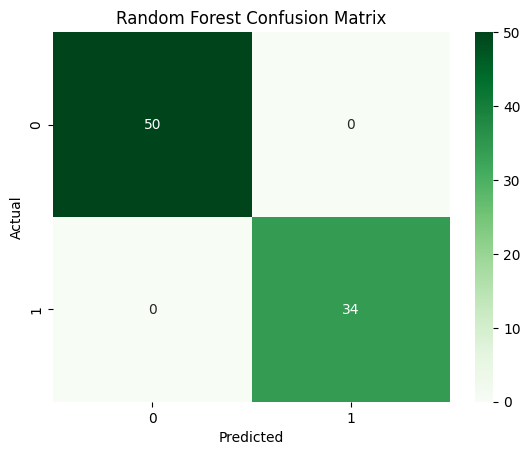

In [12]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Feature Importance(Random Forest)

In [15]:
importance_df=pd.DataFrame(
    {
        "Feature":x.columns,
        "Importance":rf_model.feature_importances_
    }
).sort_values(by="Importance",ascending=False)
importance_df.head(10)

,Feature,Importance
2,Sex,0.826858
6,Fare,0.044088
0,PassengerId,0.033436
3,Age,0.030227
7,FamilySize,0.014195
9,Embarked_Q,0.011020
8,IsAlone,0.009790
1,Pclass,0.008521
5,Parch,0.008171
10,Embarked_S,0.007329


Plot Feature Importance

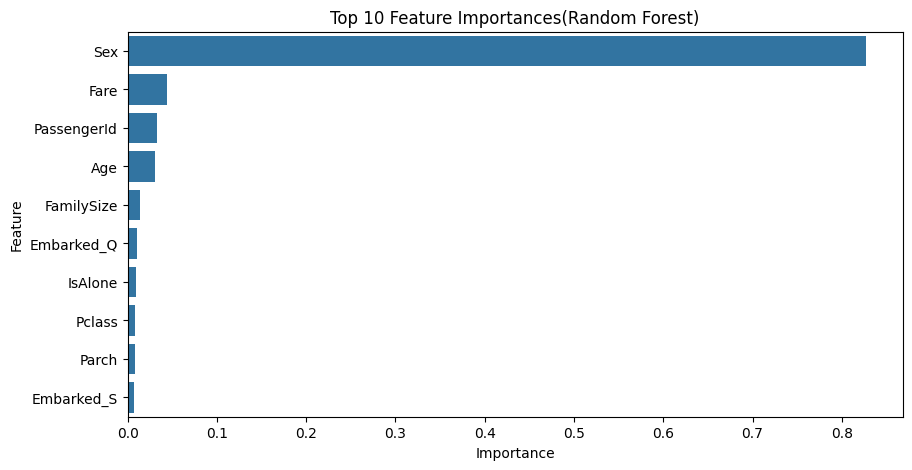

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=importance_df.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances(Random Forest)")
plt.show()

Hyperparameter Tuning

In [18]:
configs=[
    {"n_estimators":50,"max_depth":5},
    {"n_estimators":100,"max_depth":8},
    {"n_estimators":200,"max_depth":None}
]
results=[]
for cfg in configs:
    model=RandomForestClassifier(
        n_estimators=cfg["n_estimators"],
        max_depth=cfg["max_depth"],
        random_state=42
    )
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    results.append({
        "Estimators":cfg["n_estimators"],
        "Max Depth":cfg["max_depth"],
        "Accuracy":accuracy_score(y_test,preds),
        "F1-score":f1_score(y_test,preds)
    })
pd.DataFrame(results)

,Estimators,Max Depth,Accuracy,F1-score
0,50,5.0,1.0,1.0
1,100,8.0,1.0,1.0
2,200,NaN,1.0,1.0


• Random Forest combines multiple decision trees
• Ensemble learning reduces overfitting
• Performance improved compared to single Decision Tree
• Feature importance is more stable and reliable
• Sex, Fare, and Pclass remained top features
• Increasing trees improves stability, not always accuracy
• Random Forest handles variance better than single models
• Preferred for tabular structured data
